# Import Libraries

In [3]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Tests
from scipy import stats
from scipy.stats import pearsonr, chi2_contingency, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg

In [4]:
# Load data
df = pd.read_excel('/Users/n/Desktop/US Health Insurance Dataset.xlsx')

In [5]:
sns.set_palette("deep")

# Exploratory Data Analysis

## Data Overview

In [8]:
# Basic info
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# Summary

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# Checking for unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [14]:
# Checking for duplicate values
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [15]:
# Removing duplicate values
df.drop_duplicates(inplace=True)

## Univariate Analysis 

#### Age

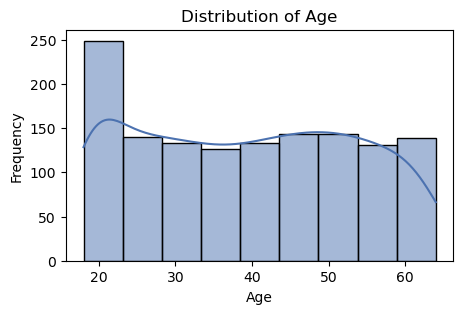

In [18]:
# Age histogram
plt.figure(figsize=(5,3))
sns.histplot(df.age, kde=True, binwidth = 5, binrange = (18, 64))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

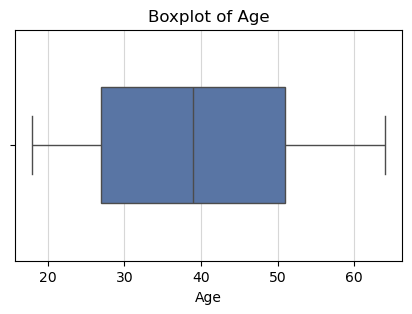

In [19]:
# Age box plot
plt.figure(figsize=(5,3))
sns.boxplot(x='age', data=df, width=0.5)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(axis='x', alpha=0.5)
plt.show()

In [20]:
# Age outliers
z_scores = stats.zscore(df.age)
df[(z_scores > 3) | (z_scores < -3)]

# No significant outliers for age

,age,sex,bmi,children,smoker,region,charges


In [21]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
print(df.shape)
print(df_cleaned.shape)
# No outliers for age

(1337, 7)
(1337, 7)


In [22]:
# Age summary
df.age.describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

#### Sex

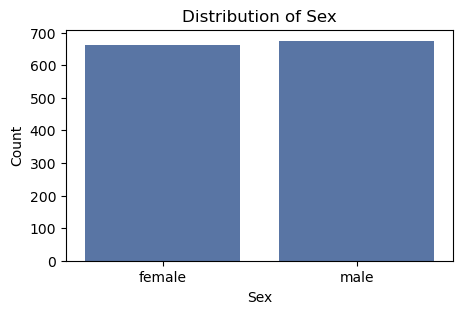

In [24]:
# Sex count plot 
plt.figure(figsize=(5,3))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [25]:
# Count of male and females
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

#### BMI

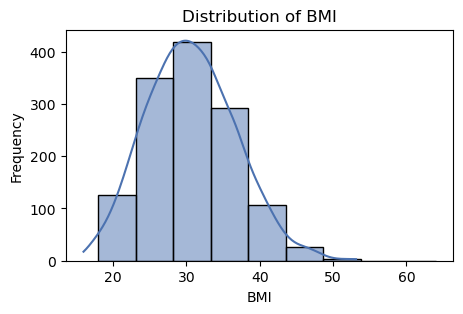

In [27]:
# BMI histogram
plt.figure(figsize=(5,3))
sns.histplot(df.bmi, kde=True, binwidth = 5, binrange = (18, 64))
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# fairly normal distribution

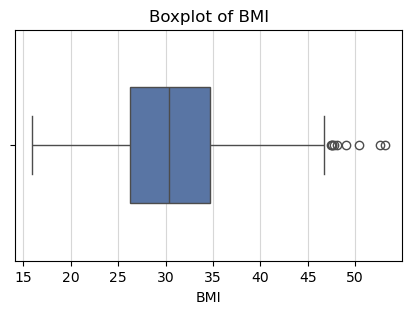

In [28]:
# BMI box plot
plt.figure(figsize=(5,3))
sns.boxplot(x='bmi', data=df, width=0.5)
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.grid(axis='x', alpha=0.5)
plt.show()

# outliers of high BMI value

In [29]:
# BMI outliers
z_scores = stats.zscore(df.bmi)
df[(z_scores > 3) | (z_scores < -3)]

# 4 significant outliers

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [30]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df.bmi >= lower_bound) & (df.bmi <= upper_bound)]
print(df.shape)
print(df_cleaned.shape)
# 9 outliers

# BMI summary without outliers
df_cleaned.bmi.describe()

# Temporarily not removing as there is not a significant amount of outliers

(1337, 7)
(1328, 7)


count    1328.000000
mean       30.537308
std         5.922176
min        15.960000
25%        26.220000
50%        30.300000
75%        34.488750
max        46.750000
Name: bmi, dtype: float64

In [31]:
# BMI summary
df.bmi.describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

#### Children

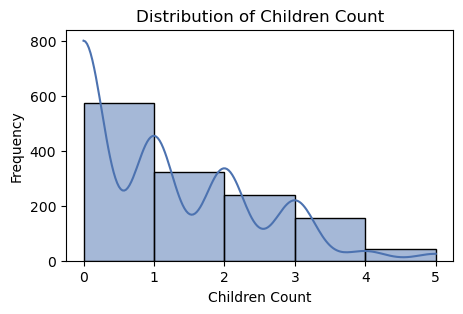

In [33]:
# Children histogram
plt.figure(figsize=(5,3))
sns.histplot(df.children, kde=True, binwidth=1)
plt.title('Distribution of Children Count')
plt.xlabel('Children Count')
plt.ylabel('Frequency')
plt.show()

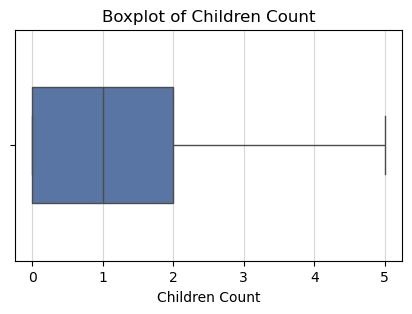

In [34]:
# Children count box plot
plt.figure(figsize=(5,3))
sns.boxplot(x='children', data=df, width=0.5)
plt.title('Boxplot of Children Count')
plt.xlabel('Children Count')
plt.grid(axis='x', alpha=0.5)
plt.show()

In [35]:
# Children count outliers
z_scores = stats.zscore(df.children)
df[(z_scores > 3) | (z_scores < -3)]

# There seems to be signifanct outliers, however, that is likely due to a small spread of values

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
71,31,male,28.500,5,no,northeast,6799.45800
166,20,female,37.000,5,no,southwest,4830.63000
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
438,52,female,46.750,5,no,southeast,12592.53450
568,49,female,31.900,5,no,southwest,11552.90400
640,33,male,42.400,5,no,southwest,6666.24300
877,33,male,33.440,5,no,southeast,6653.78860
932,46,male,25.800,5,no,southwest,10096.97000


In [36]:
Q1 = df.children.quantile(0.25)
Q3 = df.children.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df.children >= lower_bound) & (df.children <= upper_bound)]
print(df.shape)
print(df_cleaned.shape)
# No outliers

(1337, 7)
(1337, 7)


In [37]:
# BMI summary
df.children.describe()

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

#### Smoker

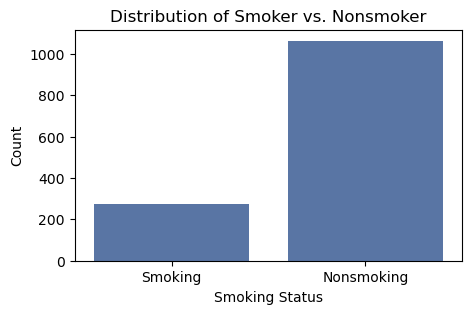

In [39]:
# Smoker vs nonsmoker count plot 
plt.figure(figsize=(5,3))
sns.countplot(x='smoker', data=df)
plt.title('Distribution of Smoker vs. Nonsmoker')
plt.xlabel('Smoking Status')
plt.xticks(ticks=[0, 1], labels=['Smoking', 'Nonsmoking'])
plt.ylabel('Count')
plt.show()

In [40]:
# Count of Smokers and Nonsmokers
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

#### Region

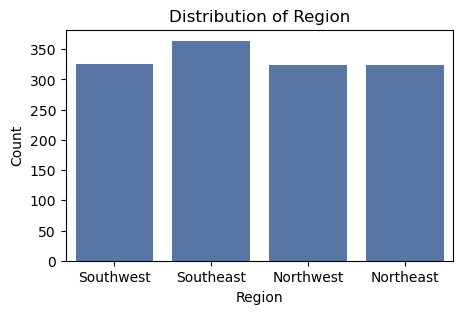

In [42]:
# Region count plot 
plt.figure(figsize=(5,3))
sns.countplot(x='region', data=df)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Southwest', 'Southeast', 'Northwest', 'Northeast'])
plt.ylabel('Count')
plt.show()

#Southeast slightly greater than the rest

In [43]:
# Count of different regions
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

#### Charges

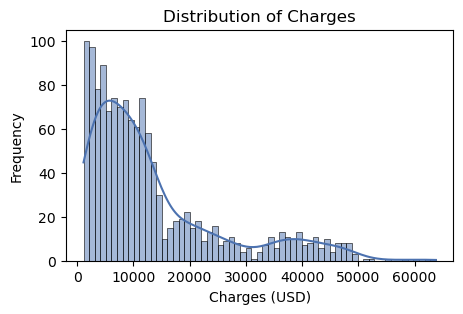

In [45]:
# Charges histogram
plt.figure(figsize=(5,3))
sns.histplot(df.charges, kde=True, binwidth=1000)
plt.title('Distribution of Charges')
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.show()

# Charges appear to be very right-skewed
# Has a small peak at around 40000

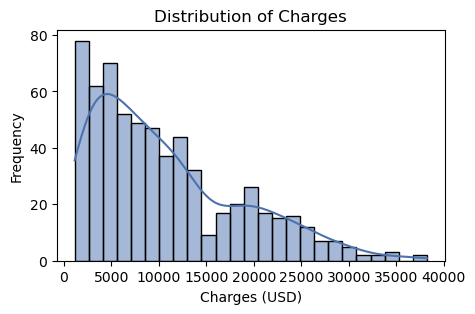

In [46]:
# Charges histogram for nonobese individuals
plt.figure(figsize=(5,3))
sns.histplot(df.charges[df.bmi < 30], kde=True, binwidth=1500)
plt.title('Distribution of Charges')
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.show()

# There are actually three peaks through the whole distribution of charges
# Located around 5000, 200000, 400000

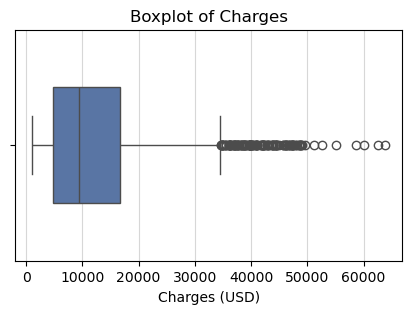

In [47]:
# Charges box plot
plt.figure(figsize=(5,3))
sns.boxplot(x='charges', data=df, width=0.5)
plt.title('Boxplot of Charges')
plt.xlabel('Charges (USD)')
plt.grid(axis='x', alpha=0.5)
plt.show()

# Appears to be significant amounts of outliers

In [48]:
# Charges outliers
z_scores = stats.zscore(df.charges)
df[(z_scores > 3) | (z_scores < -3)]

# 7 significant outliers
# All smokers

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [49]:
Q1 = df.charges.quantile(0.25)
Q3 = df.charges.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df.charges >= lower_bound) & (df.charges <= upper_bound)]
print(df.shape)
print(df_cleaned.shape)
# 139 outliers, a significant amount

# BMI summary without outliers
df_cleaned.charges.describe()

# Temporarily not removing as there is a significant amount of outliers

(1337, 7)
(1198, 7)


count     1198.000000
mean      9934.671758
std       7240.216987
min       1121.873900
25%       4418.591062
50%       8411.754950
75%      12955.356300
max      34472.841000
Name: charges, dtype: float64

In [50]:
# BMI summary
df.charges.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

## Bivariate Analysis

#### Pairplot Visualization

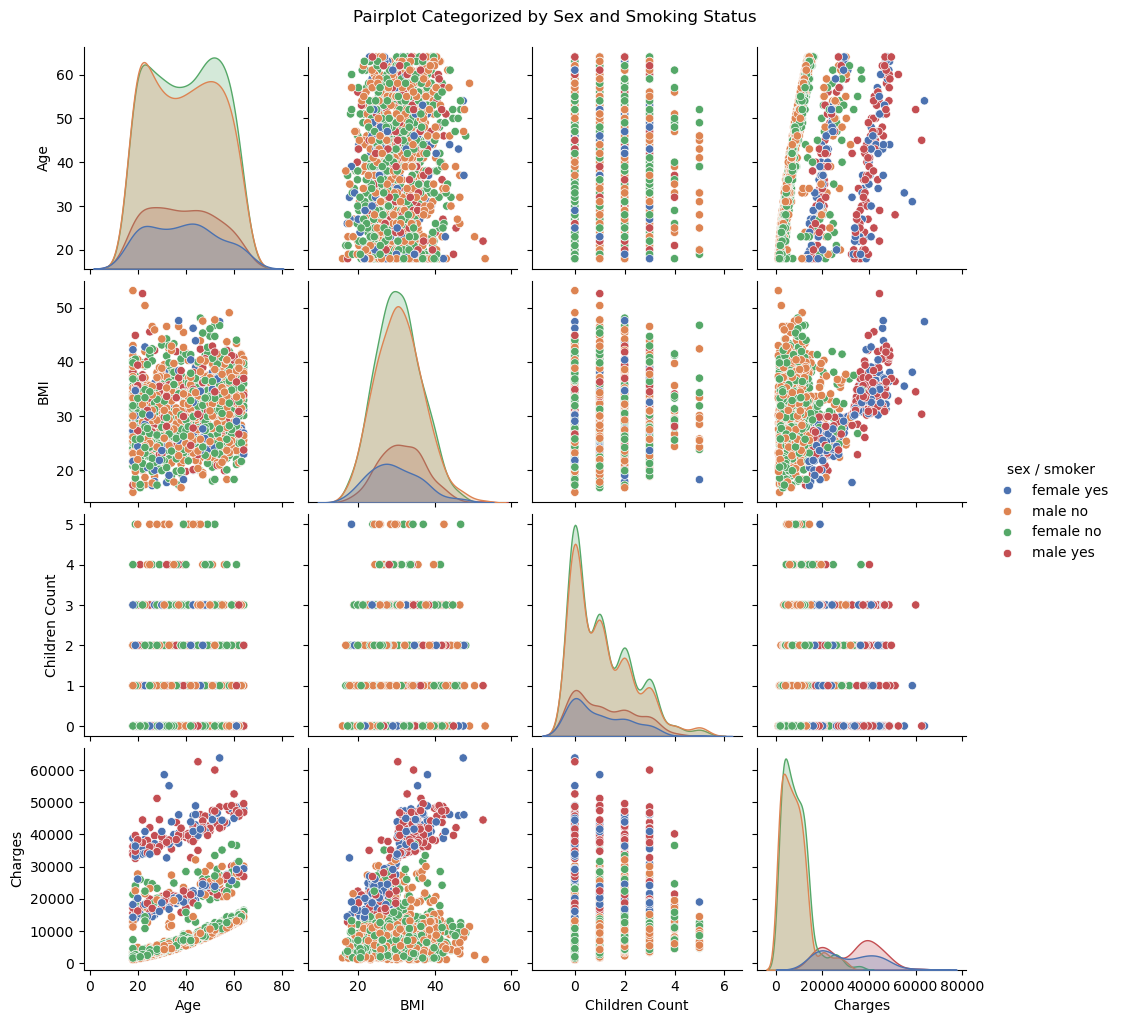

In [53]:
# Pairplot Categorized by Sex and Smoking Status

df['sex / smoker'] = df.sex + ' ' + df.smoker
g = sns.pairplot(df, hue='sex / smoker')
plt.suptitle('Pairplot Categorized by Sex and Smoking Status', y=1.02)
labels=['Age', 'BMI', 'Children Count', 'Charges']
g.x_vars=labels
g.y_vars=labels
g._add_axis_labels()
plt.show()

# Male and female smokers have significantly higher charges in Age, Bmi, and Children Count vs. Charges
# Male and female nonsmokers seem to have the lowest charges in all respective plots as well

#### Age Vs. Charges

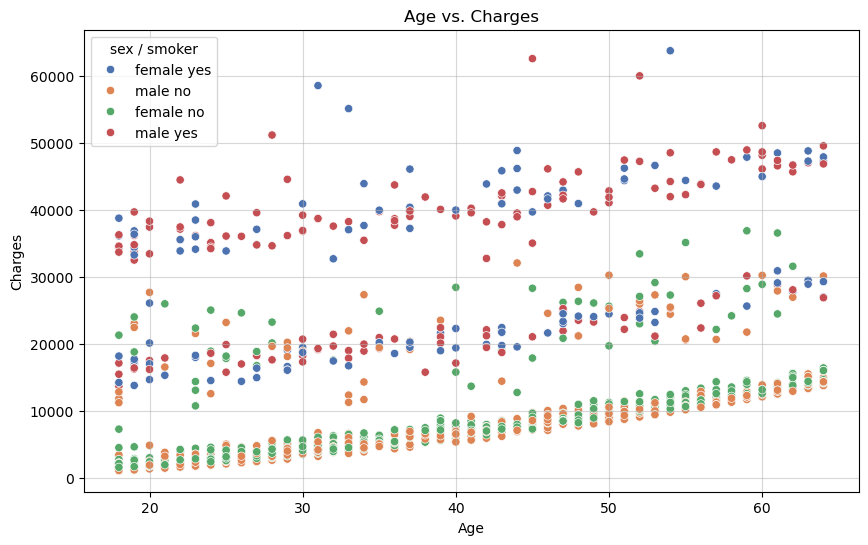

In [55]:
# Scatter plot of age and charges
df['sex / smoker'] = df.sex + ' ' + df.smoker
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='charges', hue='sex / smoker')
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True, alpha=0.5)
plt.show()

# Clear there is a linear positive relationship between age and charges
# Highest level of charges exclusive to smokers
# Lowest level of charges exclusive to nonsmokers
# Sex seems to have no noticeable impact
# Visually it is clear there is a correlation between smoking status and charges
# Three layers of charges for each peak in the univariate charges graph
# The reasoning for why there is a middle layer with all four categories mixed together is still unclear (2nd peak of charges)

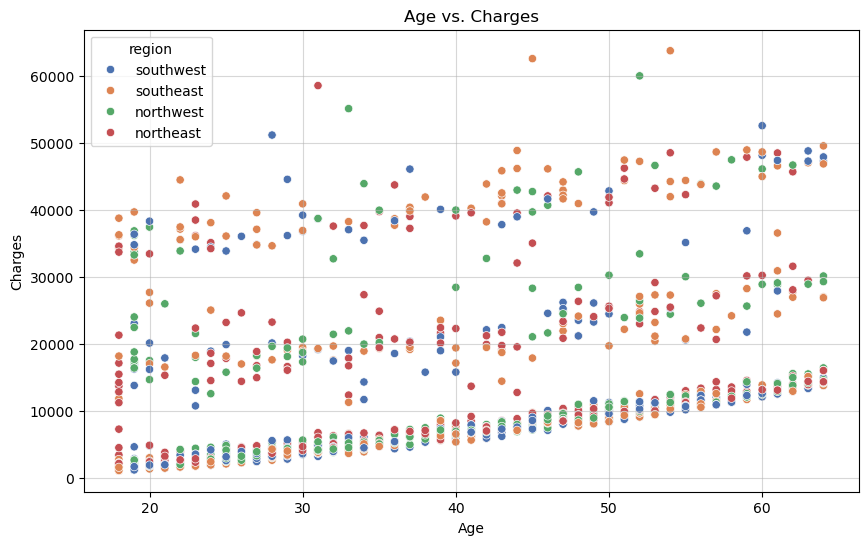

In [56]:
# Scatter plot of age and chargers categorized by region
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='charges', hue='region')
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True, alpha=0.5)
plt.show()

# Further examination of Age vs. Charges using regions, does not provide additional insight

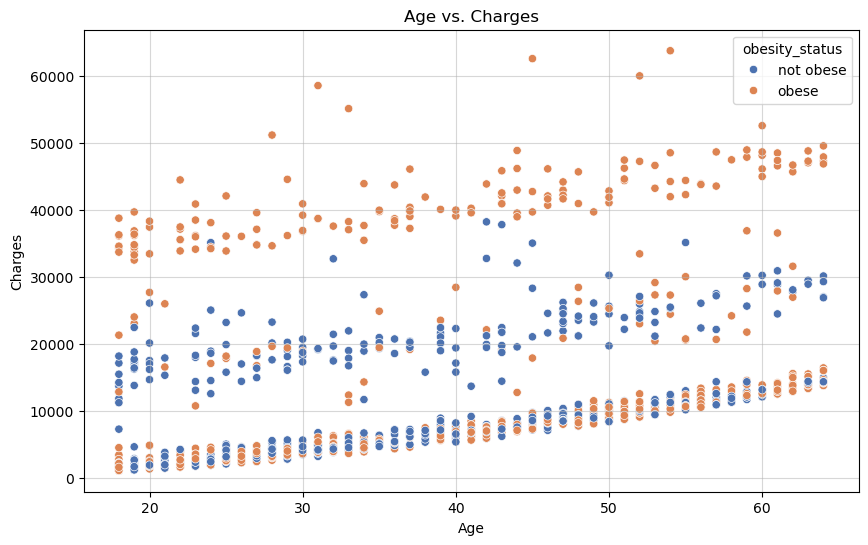

In [57]:
# Scatter plot of age and charges categorized by obesity
df['obesity_status'] = df.bmi.apply(lambda x:'obese' if x >=30 else 'not obese')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='charges', hue='obesity_status')
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True, alpha=0.5)
plt.show()

# The bottom layer is mixed 
# The middle layer is nonobese individuals
# The top layer is primarily obese individuals

#### Sex Vs. Charges

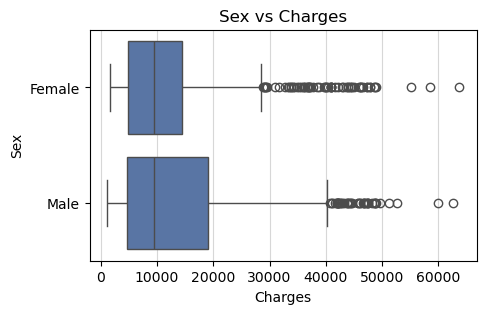

In [59]:
# Box plot of sex and charges
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='charges', y='sex')
plt.title('Sex vs Charges')
plt.xlabel('Charges')
plt.ylabel('Sex')
plt.yticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.grid(axis='x', alpha=0.5)
plt.show()

# Visually suggests males may have slightly higher charges than females on the surface level
# However, females have a greater spread of outliers & the highest charges outlier 

In [60]:
# Summary of Male vs Female
male_summary = df[df.sex == 'male'].describe()
female_summary = df[df.sex == 'female'].describe()
print(male_summary)
print(female_summary)

# Males have a higher 75% quartile for charges

              age         bmi    children       charges
count  675.000000  675.000000  675.000000    675.000000
mean    38.946667   30.943652    1.117037  13974.998864
std     14.039584    6.144973    1.219132  12971.958663
min     18.000000   15.960000    0.000000   1121.873900
25%     26.000000   26.410000    0.000000   4654.022675
50%     39.000000   30.690000    1.000000   9377.904700
75%     51.000000   35.025000    2.000000  19006.685500
max     64.000000   53.130000    5.000000  62592.873090
              age         bmi    children       charges
count  662.000000  662.000000  662.000000    662.000000
mean    39.503021   30.377749    1.074018  12569.578844
std     14.054223    6.046023    1.192115  11128.703801
min     18.000000   16.815000    0.000000   1607.510100
25%     27.000000   26.125000    0.000000   4885.158700
50%     40.000000   30.107500    1.000000   9412.962500
75%     51.750000   34.313750    2.000000  14454.691825
max     64.000000   48.070000    5.000000  63770

#### BMI Vs. Charges

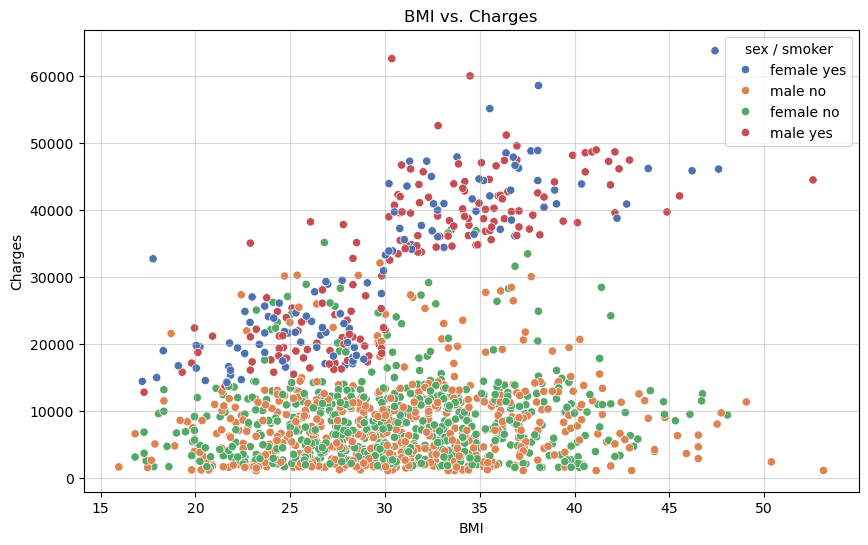

In [62]:
# Scatter plot of BMI and chargers
df['sex / smoker'] = df.sex + ' ' + df.smoker
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='sex / smoker')
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True, alpha=0.5)
plt.show()

# Visually, charges remains relatively constant for nonsmokers across all values of BMI
# Positive relationship between BMI and charges for smokers
# There is an increase of around 10,000 for charges when BMI passes 30
# BMI of 30 or higher is considered obese, meaning smokers who are considered obese recieve an instant increase in charges

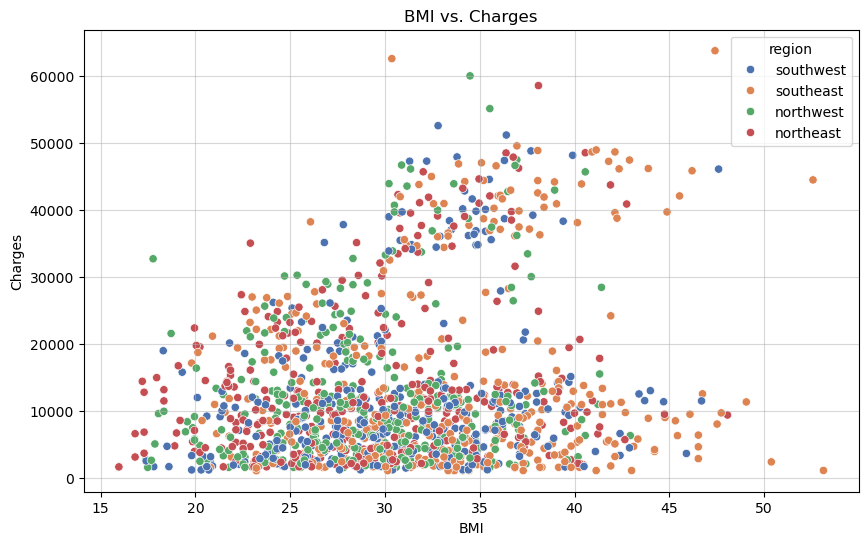

In [63]:
# Scatter plot of children and charges by regions
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='region')
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True, alpha=0.5)
plt.show()

# Individuals from southeast seem to have a relatively higher BMI than other regions
# Although how one region's BMI impacts their charges is yet unclear

#### Children Count Vs. Charges

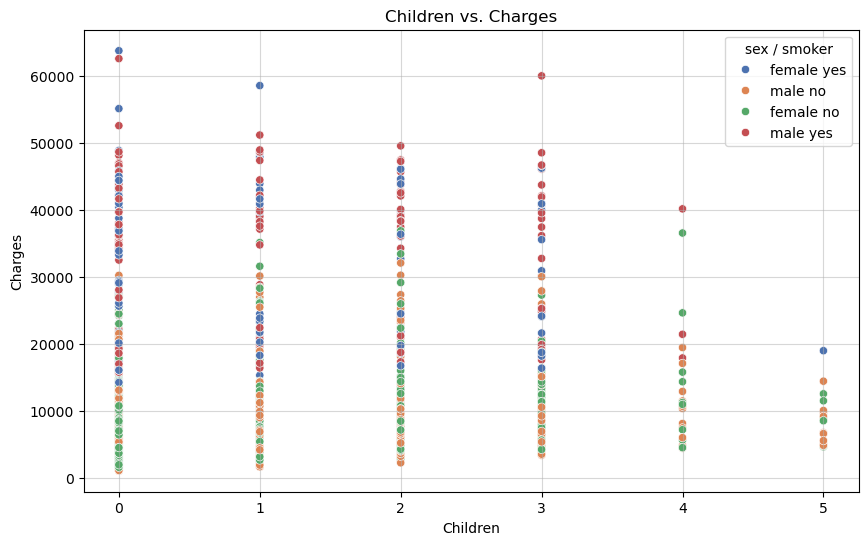

In [65]:
# Scatter plot of children and charges 
df['sex / smoker'] = df.sex + ' ' + df.smoker
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='children', y='charges', hue='sex / smoker')
plt.title('Children vs. Charges')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.grid(True, alpha=0.5)
plt.show()

# Charges significantly lower for individuals with 4 or 5 children
# Individuals who have 4 or 5 children are  majority nonsmokers, which may explain their low charges

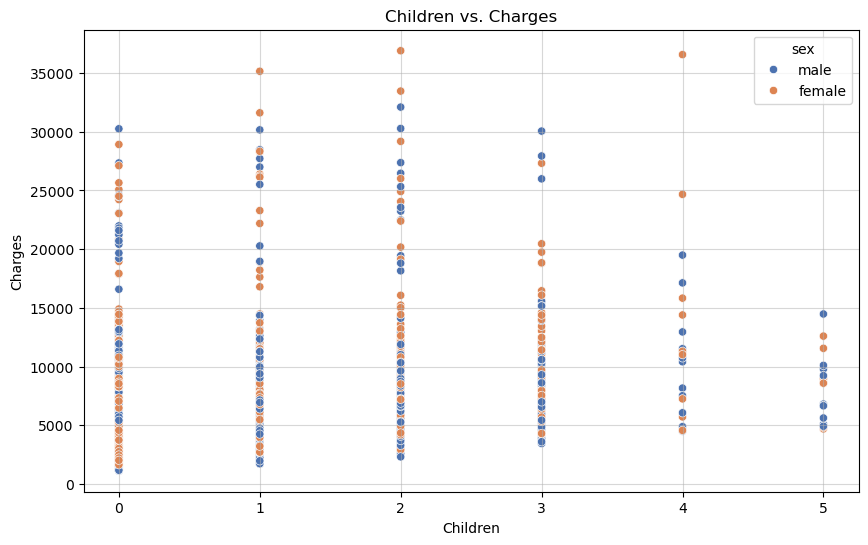

In [66]:
# Scatter plot of children count and charges for nonsmokers
nonsmoker = df[df.smoker == 'no']
plt.figure(figsize=(10,6))
sns.scatterplot(data=nonsmoker, x='children', y='charges', hue='sex')
plt.title('Children vs. Charges')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.grid(True, alpha=0.5)
plt.show()

# Higher charges are significantly less clustered with only nonsmokers
# There is a noticeable small gap in charges for individuals that have 0 to 3 children
# The gap begins around 15000 and ends around 17500
# Although frequency of higher charges are lower with nonsmokers, there is still a significant amount of high charges
# This implies there are other major factors besides smoking, that influences charging price

#### Smoking Status Vs. Charges

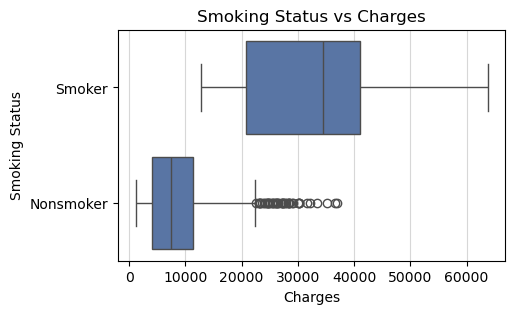

In [68]:
# Box plot of smoking status and charges
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='charges', y='smoker')
plt.title('Smoking Status vs Charges')
plt.xlabel('Charges')
plt.ylabel('Smoking Status')
plt.yticks(ticks=[0, 1], labels=['Smoker', 'Nonsmoker'])
plt.grid(axis='x', alpha=0.5)
plt.show()

# Smokers signficantly have higher charges than nonsmokers in all aspects
# Smokers and nonsmokers intersect around 15000 to 20000

In [69]:
# Summary of Smoker vs Nonsmoker
smoker_summary = df[df.smoker == 'yes'].describe()
nonsmoker_summary = df[df.smoker == 'no'].describe()
print(smoker_summary)
print(nonsmoker_summary)

              age         bmi    children       charges
count  274.000000  274.000000  274.000000    274.000000
mean    38.514599   30.708449    1.113139  32050.231832
std     13.923186    6.318644    1.157066  11541.547176
min     18.000000   17.195000    0.000000  12829.455100
25%     27.000000   26.083750    0.000000  20826.244213
50%     38.000000   30.447500    1.000000  34456.348450
75%     49.000000   35.200000    2.000000  41019.207275
max     64.000000   52.580000    5.000000  63770.428010
               age          bmi     children       charges
count  1063.000000  1063.000000  1063.000000   1063.000000
mean     39.404516    30.651853     1.091251   8440.660307
std      14.076133     6.045956     1.218250   5992.973800
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.315000     0.000000   3988.883500
50%      40.000000    30.305000     1.000000   7345.726600
75%      52.000000    34.430000     2.000000  11363.019100
max      64.000000    53

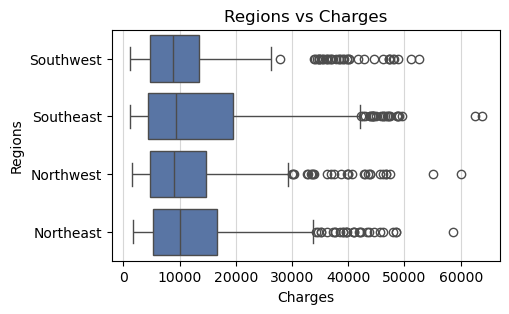

In [70]:
# Box plot of smoking status and charges
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='charges', y='region')
plt.title('Regions vs Charges')
plt.xlabel('Charges')
plt.ylabel('Regions')
plt.yticks(ticks=[0, 1, 2, 3], labels=['Southwest', 'Southeast', 'Northwest', 'Northeast'])
plt.grid(axis='x', alpha=0.5)
plt.show()

# Southeast has a greater spread and higher upper quartile values

#### Correlation Matrix

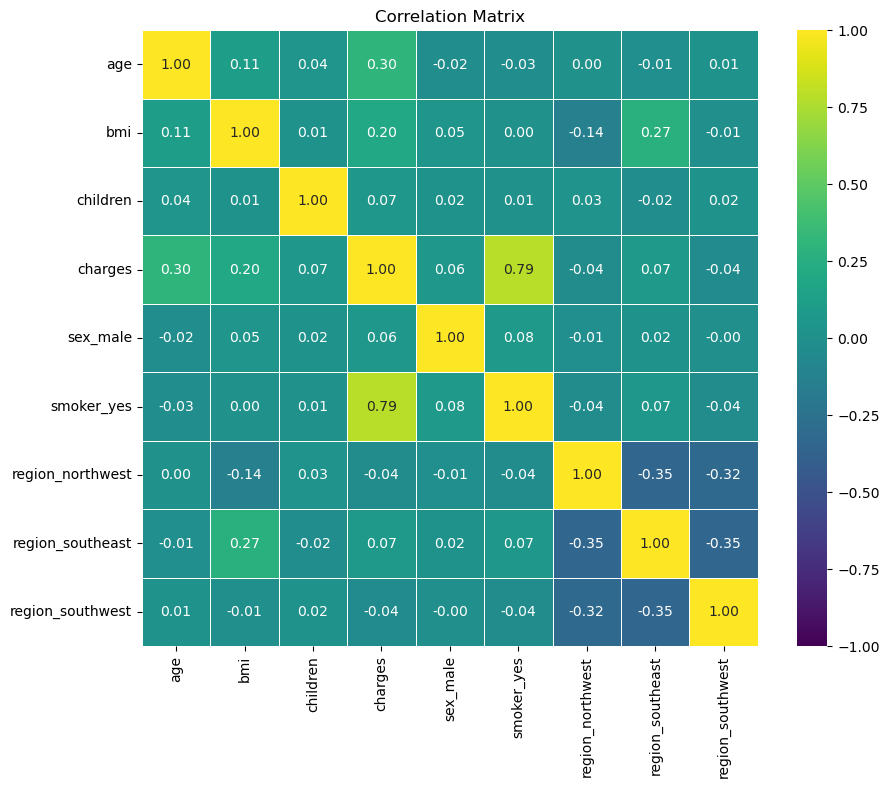

In [72]:
# Correlation Matrix
columns_to_use = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
df_selected = df[columns_to_use]
# One-hot encoding 
df_encoded = pd.get_dummies(df_selected, columns=['sex', 'smoker', 'region'], drop_first=True)
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='viridis', vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            square=True, linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

# Strong positive correlation of 0.79 between smoking and charges 
# Moderate positive correlation of 0.30 between age and charges
# Weak positive correlation of 0.20 between bmi and charges 
# Sex, children count, and regions have little to no correlation with charges 
# Results imply smoking and age are the main driving factors for the prices of health insurance 

## Feature Selection

### Filter Methods

#### Correlation Coefficients: Smoking Status, Age, BMI, and Charges

In [76]:
# smoking status and charges
df['smoker_numeric'] = df.smoker.map({'yes': 1, 'no': 0})
corr_smoker_charges = pearsonr(df.smoker_numeric, df.charges)
print(f'Smoking status: {corr_smoker_charges}')
# age and charges
corr_age_charges = pearsonr(df.age, df.charges)
print(f'Age: {corr_age_charges}')
# bmi and charges
corr_bmi_charges = pearsonr(df.bmi, df.charges)
print(f'BMI: {corr_bmi_charges}')

# When paired with charges, smoking status has strong correlation; age has weak to moderate correlation; and BMI has weak
# correlation
# P values of all correlation coefficients are extremely low, indicating significant relationships regardless of 
# strength of the correlation

# From previous scatter plot analysis, there is a strong correlation between BMI and 
# charges for smokers. The correlation coefficent of smoker's BMI and charges may be higher than nonsmoker's BMI
# and charges.

Smoking status: PearsonRResult(statistic=0.7872343672800283, pvalue=1.406722094950801e-282)
Age: PearsonRResult(statistic=0.2983082125097873, pvalue=6.975748762688954e-29)
BMI: PearsonRResult(statistic=0.1984008312262494, pvalue=2.4680404264512503e-13)


In [77]:
# Comparing correlation coefficients between smoker's BMI and nonsmoker's BMI with charges

smokers_df = df[df.smoker_numeric == 1]
nonsmokers_df = df[df.smoker_numeric == 0]
corr_smoker_bmi_charges = pearsonr(smokers_df.bmi, smokers_df.charges)
corr_nonsmoker_bmi_charges = pearsonr(nonsmokers_df.bmi, nonsmokers_df.charges)
print(f'Smoker BMI: {corr_smoker_bmi_charges}')
print(f'Nonsmoker BMI: {corr_nonsmoker_bmi_charges}')

# Correlation coefficient between smoker BMI and charges is 0.81, strongly positive correlation
# Correlation coefficient between nonsmoker BMI and charges is 0.08, very weak positive correlation
# p value for both results are significantly low
# Smoker BMI and charges p value is extremely low, implying a strong and significant correlation BMI and charges for smokers
# BMI is a significant factor affecting insurance charges for smokers, with little to no impact for nonsmokers

Smoker BMI: PearsonRResult(statistic=0.8064806070155409, pvalue=5.0196686317937166e-64)
Nonsmoker BMI: PearsonRResult(statistic=0.08407651699889868, pvalue=0.006091103478055465)


In [78]:
# Comparing correlation coefficients between obsese and nonobese smoker's BMI with charges

obese_smokers_df = smokers_df[smokers_df.bmi >= 30]
nonobese_smokers_df = smokers_df[smokers_df.bmi < 30]
corr_smoker_obese_charges = pearsonr(obese_smokers_df.bmi, obese_smokers_df.charges)
corr_smoker_nonobese_charges = pearsonr(nonobese_smokers_df.bmi, nonobese_smokers_df.charges)
print(f'Obese Smoker: {corr_smoker_obese_charges}')
print(f'Nonobese Smoker: {corr_smoker_nonobese_charges}')

# Correlation coefficient of 0.37 and 0.31 implies obese and nonobese smokers have a moderate positive correlation
# between their BMI and charges
# Both p-values are extremely low and imply both are significant relationships 
# Obese smokers have a slightly stronger correlation between BMI and charges than nonobese smokers

# Summary:
# - Weak correlation between bmi and charges for nonsmokers
# - Strong positive correlation between bmi and charges for smokers
# - Moderate positive correlation between bmi and charges for nonobese smokers
# - Slightly higher moderate positive correlation between bmi and charges for obese smokers

Obese Smoker: PearsonRResult(statistic=0.37900759212111634, pvalue=2.589522777270572e-06)
Nonobese Smoker: PearsonRResult(statistic=0.3055272373990007, pvalue=0.00043004479454264254)


#### Chi-Square Test: Smoking Status and Sex

In [80]:
# Smoking status and sex
contingency_table = pd.crosstab(df.smoker, df.sex)
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2}, P-value: {p}, Degrees of Freedom: {dof}')

# 0.006 p-value means null hypothesis is rejected and a there is a significant relationship between smoking status and sex

Chi-square Statistic: 7.469139330086637, P-value: 0.006276555012010762, Degrees of Freedom: 1


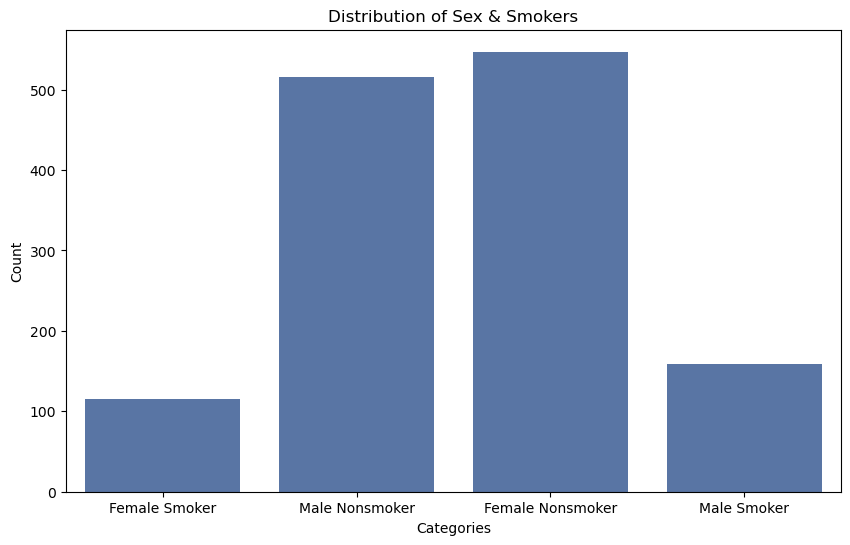

In [81]:
# Sex count plot 
plt.figure(figsize=(10,6))
sns.countplot(x='sex / smoker', data=df)
plt.title('Distribution of Sex & Smokers')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Female Smoker', 'Male Nonsmoker', 'Female Nonsmoker', 'Male Smoker'])
plt.show()

# Visually it appears that men have a slight greater tendency to smoke compared to women

In [82]:
smoker_counts = df.groupby(['sex', 'smoker']).size().unstack(fill_value=0)

male_smokers = smoker_counts.loc['male', 'yes']
male_nonsmokers = smoker_counts.loc['male', 'no']
female_smokers = smoker_counts.loc['female', 'yes']
female_nonsmokers = smoker_counts.loc['female', 'no']

male_ratio = male_smokers / male_nonsmokers
female_ratio = female_smokers / female_nonsmokers

print(f'Male Smokers: {male_smokers}, Male Nonsmokers: {male_nonsmokers}, Ratio: {male_ratio:.2f}')
print(f'Female Smokers: {female_smokers}, Female Nonsmokers: {female_nonsmokers}, Ratio: {female_ratio:.2f}')

# May imply sex does not directly impact health insurance charges, however, it does correlate with smoking status which impacts charges

Male Smokers: 159, Male Nonsmokers: 516, Ratio: 0.31
Female Smokers: 115, Female Nonsmokers: 547, Ratio: 0.21


#### Chi-Square Test: Smoking Status and Region

In [84]:
# Smoking status and region
contingency_table = pd.crosstab(df.smoker, df.region)
chi2_contingency(contingency_table)

# p-value of 0.064 > 0.05 means null hypothesis is not rejected
# implies relationship between smoking status and region is not significant 

Chi2ContingencyResult(statistic=7.277902541321909, pvalue=0.06354826573182329, dof=3, expected_freq=array([[257.60059835, 257.60059835, 289.40314136, 258.39566193],
       [ 66.39940165,  66.39940165,  74.59685864,  66.60433807]]))

#### Chi-Square Test: Sex and Region

In [86]:
# Region and sex
contingency_table = pd.crosstab(df.smoker, df.sex)
chi2_contingency(contingency_table)

# p-value of 0.063 > 0.05 means null hypothesis is not rejected
# implies relationship between sex and region is not significant 

Chi2ContingencyResult(statistic=7.469139330086637, pvalue=0.006276555012010762, dof=1, expected_freq=array([[526.33208676, 536.66791324],
       [135.66791324, 138.33208676]]))

#### Levene's Test + Welch's t-Test: Sex and Charges

In [88]:
# Conducted before t-test because of notable difference in spread of charges when looking at its boxplot
male_charges = df[df['sex'] == 'male']['charges']
female_charges = df[df['sex'] == 'female']['charges']
levene(male_charges, female_charges)

# significantly low p-value means null hypothesis is rejected
# Assumption of equal variances between male and female charges does not hold

LeveneResult(statistic=9.924363781581253, pvalue=0.0016672604848677595)

In [89]:
# Conducted instead of student t-test because equal variances is not assumed
ttest = stats.ttest_ind(male_charges, female_charges, equal_var=False)
print(ttest)

# low p-value of 0.03 means null hypothesis is rejected
# t-score indicates moderate differences between male and females for mean in charges

male_mean = male_charges.mean()
female_mean = female_charges.mean()
print(f'Male Mean Charges: {male_mean:.2f}')
print(f'Female Mean Charges: {female_mean:.2f}')

# Male mean charges are higher than female mean charges

TtestResult(statistic=2.1275372170149476, pvalue=0.03356154763676579, df=1311.8540822395769)
Male Mean Charges: 13975.00
Female Mean Charges: 12569.58


#### Levene's Test + Welch's t-Test: Smoking Status and Charges

In [91]:
# Conducted before t-test because of notable difference in spread of charges when considering BMI trends with charges
smoker_charges = df[df['smoker'] == 'yes']['charges']
nonsmoker_charges = df[df['smoker'] == 'no']['charges']
levene(smoker_charges, nonsmoker_charges)

# significantly low p-value means null hypothesis is rejected
# Assumption of equal variances between smokers and nonsmokers charges does not hold

LeveneResult(statistic=332.47137394800666, pvalue=1.6701175651267598e-66)

In [92]:
# smoking and charges
ttest = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var=False)
print(ttest)

# extremely low p-value means null hypothesis is rejected
# high t-score indicates strong differences between smokers and nonsmokers for mean in charges

smoker_mean = smoker_charges.mean()
nonsmoker_mean = nonsmoker_charges.mean()
print(f'Smoker Mean Charges: {smoker_mean:.2f}')
print(f'Nonsmoker Mean Charges: {nonsmoker_mean:.2f}')

# Smoker mean charges are higher than nonsmoker mean charges

TtestResult(statistic=32.7423097372529, pvalue=6.261720774727631e-103, df=311.87741711542276)
Smoker Mean Charges: 32050.23
Nonsmoker Mean Charges: 8440.66


#### Levene's Test + Student's t-Test: Obese Smokers and Charges

In [94]:
obese_smoker_charges = obese_smokers_df['charges']
nonobese_smoker_charges = nonobese_smokers_df['charges']
levene(obese_smoker_charges, nonobese_smoker_charges)

# insignificant p-value means null hypothesis is not rejected
# Assumption of equal variances between obese smokers and nonobese smokers charges holds

LeveneResult(statistic=2.8298603381494405, pvalue=0.09367399538080437)

In [95]:
# equal variance is assumed
ttest = stats.ttest_ind(obese_smoker_charges, nonobese_smoker_charges)
print(ttest)

# extremely low p-value means null hypothesis is rejected
# extremely high t-score indicates strong differences between obese smokers and nonobese smokers for mean in charges

obese_smoker_mean = obese_smoker_charges.mean()
nonobese_smoker_mean = nonobese_smoker_charges.mean()
print(f'Smoker Mean Charges: {obese_smoker_mean:.2f}')
print(f'Nonsmoker Mean Charges: {nonobese_smoker_mean:.2f}')

# Obese smoker mean charges are higher than nonobese smoker mean charges
# Obesity is the driving force that substantially increase health insurance charges for smokers

TtestResult(statistic=29.805096154620625, pvalue=1.1464605609464152e-87, df=272.0)
Smoker Mean Charges: 41557.99
Nonsmoker Mean Charges: 21363.22


#### Levene's Test + Welch's ANOVA + Tukey's HSD: Regions and Charges

In [97]:
southwest_charges = df[df['region'] == 'southwest']['charges']
southeast_charges = df[df['region'] == 'southeast']['charges']
northwest_charges = df[df['region'] == 'northwest']['charges']
northeast_charges = df[df['region'] == 'northeast']['charges']
levene(southwest_charges, southeast_charges, northwest_charges, northeast_charges)

# significantly low p-value means null hypothesis is rejected
# Assumption of equal variances between region's charges does not hold

LeveneResult(statistic=5.553479860699911, pvalue=0.000868954482400632)

In [98]:
# Conducted instead of standard ANOVA because equal variances is not assumed
pg.welch_anova(dv='charges', between='region', data=df)

# insignificant p-value 0.053 > 0.05 means null hypothesis is not rejected; however, ad hoc test may be be warranted
# as p-value is so close to significant value
# Moderate f-score indicates potentially moderate differences between regions for mean in charges; however, 
# because of the p-value, the statement cannot be said with confidence

,Source,ddof1,ddof2,F,p-unc,np2
0,region,3,740.41575,2.566223,0.053489,0.006542


In [99]:
# Follow-up to Welch's ANOVA results of regions and charges
tukey = pairwise_tukeyhsd(endog=df['charges'], groups=df['region'], alpha=0.05)
print(tukey)

# null hypothesis of difference in mean charges between southeast and southwest is rejected
# There is significant difference in means for charges between the southeast and southwest regions 
# While there is a significant relationship between southeast and southwest, the meandiff of 2388 questions the 
# overall influence on charges when compared to stronger driving factors such as smoking

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -955.5437 0.7457 -3397.7353  1486.648  False
northeast southeast  1329.0269 0.4746 -1045.1237 3703.1776  False
northeast southwest -1059.4471 0.6793 -3499.7595 1380.8652  False
northwest southeast  2284.5706 0.0643     -89.58 4658.7212  False
northwest southwest  -103.9035 0.9995 -2544.2158 2336.4088  False
southeast southwest -2388.4741 0.0477 -4760.6915  -16.2567   True
-----------------------------------------------------------------


#### Welch's ANOVA + Tukey's HSD + Visualization: Sex and Smoking

In [101]:
# Did not use two-way ANOVA because both sex and smoking violates homogeneity of variance
pg.welch_anova(dv='charges', between='sex / smoker', data=df)

# extremely low p-value means null hypothesis is rejected
# extremely high f-score indicates strong relationship between sex and smoking status with charges

,Source,ddof1,ddof2,F,p-unc,np2
0,sex / smoker,3,328.196133,363.752054,5.495436e-104,0.622235


In [102]:
# Follow-up to Welch's ANOVA results of sex and smoking
tukey = pairwise_tukeyhsd(endog=df['charges'], groups=df['sex / smoker'], alpha=0.05)
print(tukey)

# Sex is not a signficant factor when both individuals are nonsmokers
# All other combinations of sex and smoking status have a significant relationship with charges
# There is an increase in mean diff for each sex group if they smoke
# Males have a greater increase in mean charges when smoking compared to females
# Male and female nonsmokers do not have significant difference in charges; however, 
# Male and female smokers do have significant difference in charges
# Sex is a significant factor when comparing the mean charges of smokers

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1     group2     meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------
 female no female yes   21916.699    0.0  19950.3525  23883.0454   True
 female no    male no   -662.5971  0.469   -1838.907    513.7128  False
 female no   male yes  24279.7087    0.0  22552.7428  26006.6746   True
female yes    male no -22579.2961    0.0 -24555.8768 -20602.7155   True
female yes   male yes   2363.0097 0.0476      16.613   4709.4064   True
   male no   male yes  24942.3058    0.0  23203.6961  26680.9155   True
-----------------------------------------------------------------------


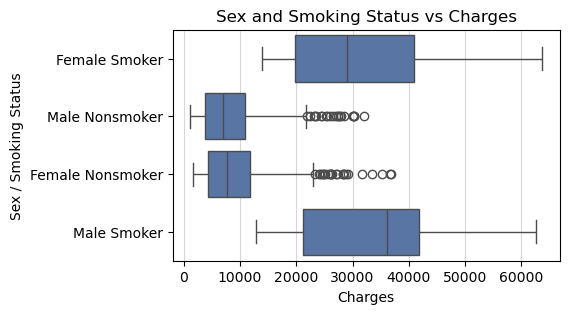

In [103]:
# Box plot of sex and smoking with charges
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='charges', y='sex / smoker')
plt.title('Sex and Smoking Status vs Charges')
plt.xlabel('Charges')
plt.ylabel('Sex / Smoking Status')
plt.yticks(ticks=[0, 1, 2, 3], labels=['Female Smoker', 'Male Nonsmoker', 'Female Nonsmoker', 'Male Smoker'])
plt.grid(axis='x', alpha=0.5)
plt.show()

# Box plots support tukey's HSD results
# Male and female nonsmokers do not have significant difference
# Male and female smokers have similar boxplots however the median line is greater shifted in the right for the male smokers

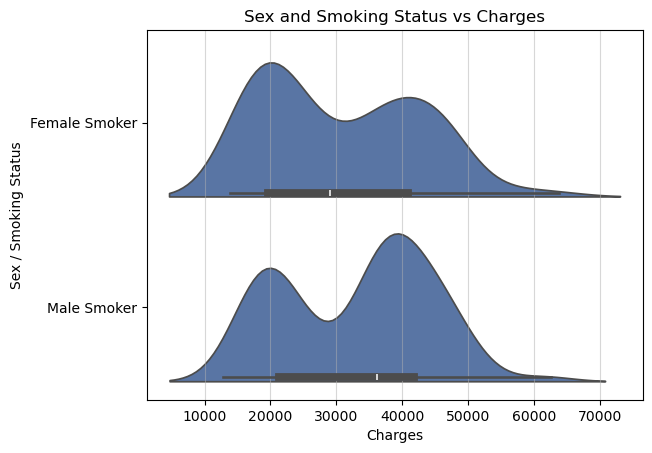

In [104]:
# Violin plot to visualize the difference in distribution between male and female smokers
sns.violinplot(x='charges', y='sex', data=smokers_df, split=True)
plt.title('Sex and Smoking Status vs Charges')
plt.xlabel('Charges')
plt.ylabel('Sex / Smoking Status')
plt.yticks(ticks=[0, 1], labels=['Female Smoker','Male Smoker'])
plt.grid(axis='x', alpha=0.5)
plt.show()

# The peak of female's distribution is located around 20000; the peak of male's distribution is located around 40000
# This suggests there is a greater density of male smokers with higher charges compared to female smokers
# Both male and female smokers experience a dip in their distribution at around 30000 for charges
# When looking at BMI vs. Charges scatterplot, this suggests the two peaks of each are categorized by obesity
# Because there is an instant increase in charges after individuals are declared obese (scatterplot suggests around 30000), 
# there is a dip in the distribution at the 30000 mark because most obese smokers' charges begin around 40000,
# This matches the secondpeak that both male and female smokers share

# The violin plot suggests the significance in difference of mean charges between male and female smokers is due to
# more men being obese compared to women 

#### Levene's Test + Student's t-Test: Sex and BMI

In [106]:
# Results from violin plot of Sex and Smoking Status vs. Charges suggest possible relationship between sex and BMI
male_bmi = df[df['sex'] == 'male']['bmi']
female_bmi = df[df['sex'] == 'female']['bmi']
levene(male_bmi, female_bmi)

# Insignificant p-value means null hypothesis is not rejected
# Assumption of equal variances between male and female bmi may be assumed

LeveneResult(statistic=0.009675710485918285, pvalue=0.9216570820139443)

In [107]:
# equal variance is assumed
ttest = stats.ttest_ind(male_bmi, female_bmi)
print(ttest)

# Insignificant p-value means null hypothesis fails to be rejected
# There is no significant difference in mean BMI between men and women 
# This is further supported by low correlation coefficients in the correlation matrix 

TtestResult(statistic=1.6970672301298684, pvalue=0.08991704324931137, df=1335.0)


#### Levene's Test + Student's t-Test: Sex and BMI for smokers

In [109]:
# Relationship between sex and BMI is insignificant; however, relationship between sex and BMI specifically for smokers has yet to be proven
male_smoker_bmi = smokers_df[smokers_df['sex'] == 'male']['bmi']
female_smoker_bmi = smokers_df[smokers_df['sex'] == 'female']['bmi']
levene(male_smoker_bmi, female_smoker_bmi)

# Insignificant p-value means null hypothesis is not rejected
# Assumption of equal variances between male and female bmi may be assumed

LeveneResult(statistic=1.59346227234859, pvalue=0.20791340245365517)

In [110]:
# equal variance is assumed
ttest = stats.ttest_ind(male_smoker_bmi, female_smoker_bmi)
print(ttest)

# 0.01 p-value means null hypothesis is rejected
# 2.47 t-score indicates strong relationship between sex and bmi for smokers
# May be the result of smoking having different health impacts on individuals of different sex

male_smoker_bmi_mean = male_smoker_bmi.mean()
female_smoker_bmi_mean = female_smoker_bmi.mean()
print(f'Male Smoker Mean BMI: {male_smoker_bmi_mean:.2f}')
print(f'Female Smoker Mean BMI: {female_smoker_bmi_mean:.2f}')

# Male smoker mean bmi are higher than female smoker mean bmi
# These results support the distribution of the violin plot 

TtestResult(statistic=2.4740249902197333, pvalue=0.013970622434978562, df=272.0)
Male Smoker Mean BMI: 31.50
Female Smoker Mean BMI: 29.61
